In [2]:
import tensorflow as tf 
import numpy as np 
import matplotlib. pyplot as plt 
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Reshape,Dropout,Activation
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.layers import Conv1D,MaxPooling1D
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import train_test_split

In [11]:
# 
# df = pd.read_csv('AAPL.csv')
df = pd.read_csv('300721.SZ.csv')

df.head()  #显示前五行的股票数据

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-03-10,19.190001,20.290001,19.190001,20.280001,20.224771,2726333
1,2020-03-11,20.379999,20.889999,20.090000,20.270000,20.214798,3486400
2,2020-03-12,20.070000,20.500000,19.700001,19.950001,19.895670,2005854
3,2020-03-13,19.150000,20.129999,18.440001,19.889999,19.835833,2631474
4,2020-03-16,19.990000,20.459999,19.010000,19.270000,19.217522,2808300


In [12]:
#  调整后的收盘价
x0 = df['Adj Close'].values   # [100:]
#数据预处理,将所有的x0数据都转化为0-1之间的数字，并查看前十个数字
x0 = x0/max(x0)
x0[:5]

array([0.51646504, 0.51621037, 0.50806103, 0.50653302, 0.49074367])

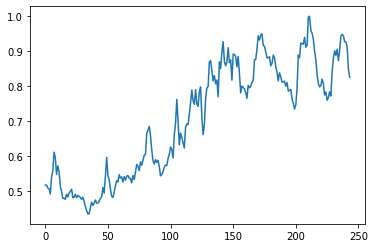

In [13]:
plt.plot(x0)

In [14]:
# 20天的数据预测下次开盘价
n=len(x0)       # 此时的n是x0的个数，p是每20天即预测一次开盘的频率
p=20

x = np.array([x0[k:k+p]for k in range(n-p+1)])    # 将每个K以后20天的值都对应好

y = np.array(x0[p:])      # y是20天预测的数据

X=x[:-1]                # X是实际可以预测到的数量，比给的数量应当少一笔
X=X[:,:,np.newaxis]     # 给X赋值，np.newaxis的功能:插入新维度

n, x.shape, y.shape, X.shape

(244, (225, 20), (224,), (224, 20, 1))

(179, 20, 1)


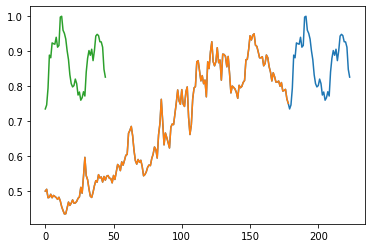

In [15]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,shuffle=False)  #拆分数据集，将test集为0.2，参数不同
print(x_train.shape)

plt.plot(y)
plt.plot(y_train)
plt.plot(y_test)

In [16]:
model=Sequential()#选择贯序模型

# 添加一维卷积层，卷积核数量为50个4x1大小，补0策略为same,保留卷积后的边界，激活函数为relu,输入的尺寸形状为（20，1）
model.add(Conv1D(50,4,padding='same',activation='relu',input_shape=(p,1)))

model.add(MaxPooling1D(2))#添加一维池化层，选择最大池化，（池化层大小是2，每两个数字留一个）

model.add(Flatten()) #添加Flatten层，Flatten层用来将输入“压平”，即把多维的输入一维化，常用在从卷积层到全连接层的过渡。

model.add(Dense(20, activation='relu'))#20个神经元的全连接层
model.add(Dropout(0.2))#dropout是CNN中防止过拟合提高效果的一个大杀器，隐含节点dropout率设置为0.2
# model.add(Activation('relu'))

model.add(Dense(1))#输出层
# model.add(Activation('relu'))

model.compile(loss='mse',optimizer=SGD(lr=0.2),metrics=['accuracy'])#编译模型，损失函数、优化器、学习率、评价函数
# model.summary()#查看神经网络模型结构

In [21]:
model.fit(x_train,y_train,epochs=1)     # 训练50回合，每次30个样本 ,batch_size=32

6/6 [==============================] - 0s 20ms/step - loss: 0.0050 - accuracy: 0.0000e+00


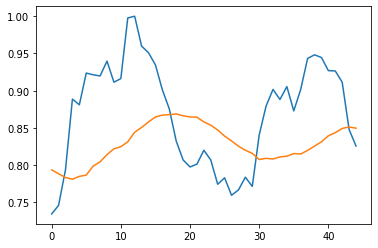

In [23]:
#模型预测=======================================================================================================
y_predict = model(x_test)#输入测试集进行预测

plt.plot(y_test)
plt.plot(y_predict)

这个走势大致相同？  
是每一天都预测对的前提。而且趋势也不太一样